<a href="https://colab.research.google.com/github/Anoziqq/NN/blob/main/Lab4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 4
#З дисципліни "Нейронні мережі"
##Виконав студент:
###групи АнД-31
###Лаврій Руслан

## Завдання
## 1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
## 2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
## 3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
## 4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

## Виділення класів і нормалізація даних

In [11]:
train_data1 = []
train_labels1 = []
for data in range(len(train_data)):
  if(train_labels[data] == 5 or train_labels[data] == 8 or train_labels[data] == 2):
    train_data1 = np.append(train_data1, train_data[data])
    train_labels1 = np.append(train_labels1, train_labels[data])
print(len(train_data1))
print(train_labels1)

test_data1 = []
test_labels1 = []
for data in range(len(test_data)):
  if(test_labels[data] == 5 or test_labels[data] == 8 or test_labels[data] == 2):
    test_data1 = np.append(test_data1, test_data[data])
    test_labels1 = np.append(test_labels1, test_labels[data])
print(len(test_data1))
print(len(test_labels1))

train_data1 = np.reshape(train_data1, (len(train_labels1), 28, 28))
test_data1 = np.reshape(test_data1, (len(test_labels1), 28, 28))

train_data1 = train_data1 / 255
test_data1 = test_data1 / 255

14112000
[2. 2. 5. ... 8. 5. 5.]
2352000
3000


## Навчання нейромережі

In [12]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/200))
fit_data = model.fit(train_data1, train_labels1, epochs=40)

Epoch 1/40
563/563 [==============================] - 4s 2ms/step - loss: 0.5312 - accuracy: 0.8410
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9813
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0571 - accuracy: 0.9851
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9865
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9873
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9888
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9887
Epoch 8/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9894
Epoch 9/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9894
Epoch 10/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9910

## Вибір оптимального кроку

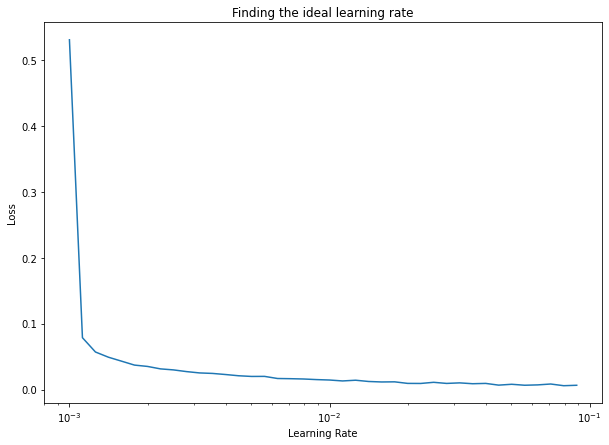

In [15]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, fit_data.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

## Confusion matrix

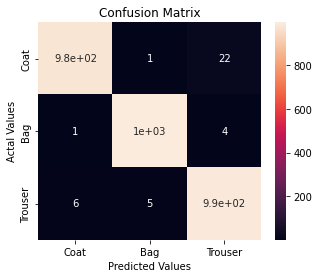

Accuracy of classification = 0.987


In [18]:
predictions = model.predict(test_data1)
y = []
for data in predictions:
  index_max = np.argmax(data)
  y = np.append(y, index_max)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels1, y)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cm_df = pd.DataFrame(cm,
                     index = ['Coat','Bag','Trouser'], 
                     columns = ['Coat','Bag','Trouser'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
accuracy =  (cm[0][0]+cm[1][1]+cm[2][2]) /(cm.sum())
print('Accuracy of classification = {:0.3f}'.format(accuracy))